In [25]:
import ira
%alphalab dark

%run initlibs.py Lustre dark
from tools.loaders.data_loaders import load_data
from tools.charting.signals_charts import plot_entries

import qlearn as q
%run trackers.py
%run generators.py
%run indicators.py

In [5]:
md = load_data('amp:AUS200')

In [31]:
lbr = q.SingleInstrumentComposer(Lustre('1d', 14, 0.5, 150, 10)).fit(md.ticks())

In [33]:
r = q.simulation({
    'Fix (AUS)': [lbr, RADChandelier(1, '1d', 22, 5, debug=False)], 
}, md['AUS200'].ohlcs('1h'), 'stock', 'Lustre AUS 1D', spreads=0)

 0: Lustre AUS 1D/Fix (AUS)  : Sharpe: 0.89 | Sortino: 1.38 | CAGR: 39.84 | DD: $1700.90 (50.96%) | Gain: $1648.80 | Execs: 11[OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions
0,Lustre AUS 1D/Fix (AUS),0.890739,1.379648,39.842725,1700.9,50.960242,1648.8,11


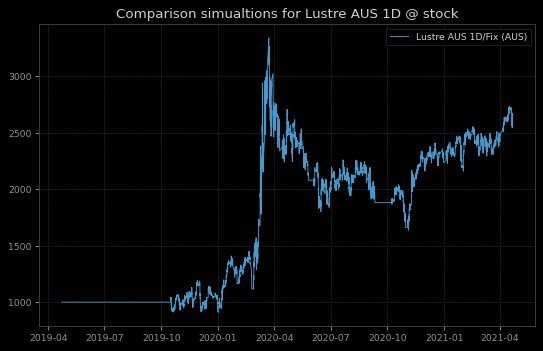

In [34]:
r.report(1000)

In [50]:
td = pd.DataFrame.from_dict(z_load('RAD_test')['data'], orient='index')

In [29]:
lbr.predict(md['AUS200'].ohlcs('1h')).head()

,AUS200
time,
2019-04-22 23:59:59,NaN
2019-10-23 23:59:59,1.0
2019-11-07 23:59:59,1.0
2019-11-14 23:59:59,1.0
2019-12-03 23:59:59,-1.0


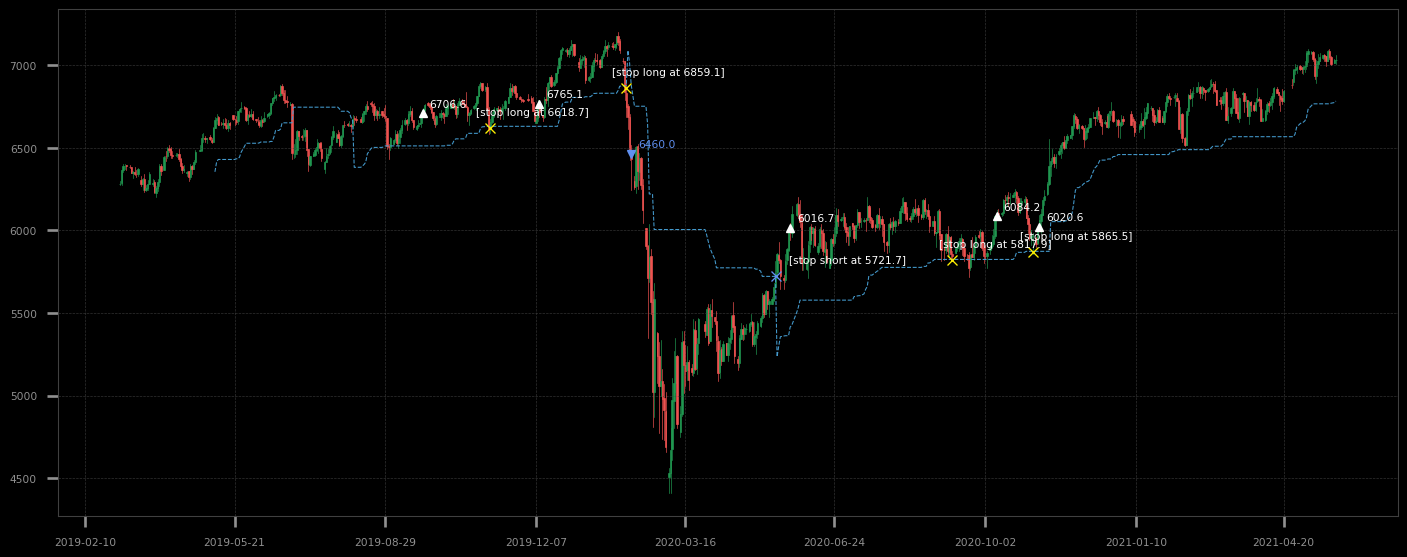

In [30]:
fig(18, 7)
rd = rad_indicator(md['AUS200'].ohlc('1d'), 22, 5)
ohlc_plot(md['AUS200'].ohlc('1d'))

plt.plot(rd.rad.shift(1), '--')
plot_entries(r.results[0].executions, font_size=8, ms=7)

# sx = td[td.Side.diff()!=0].Side
# plt.axvline(
# [plt.axvline(t, ls='--', c='g') for t in sx[sx == 1].index];
# [plt.axvline(t, ls='--', c='orange') for t in sx[sx == -1].index];
# plt.plot(td.Level)

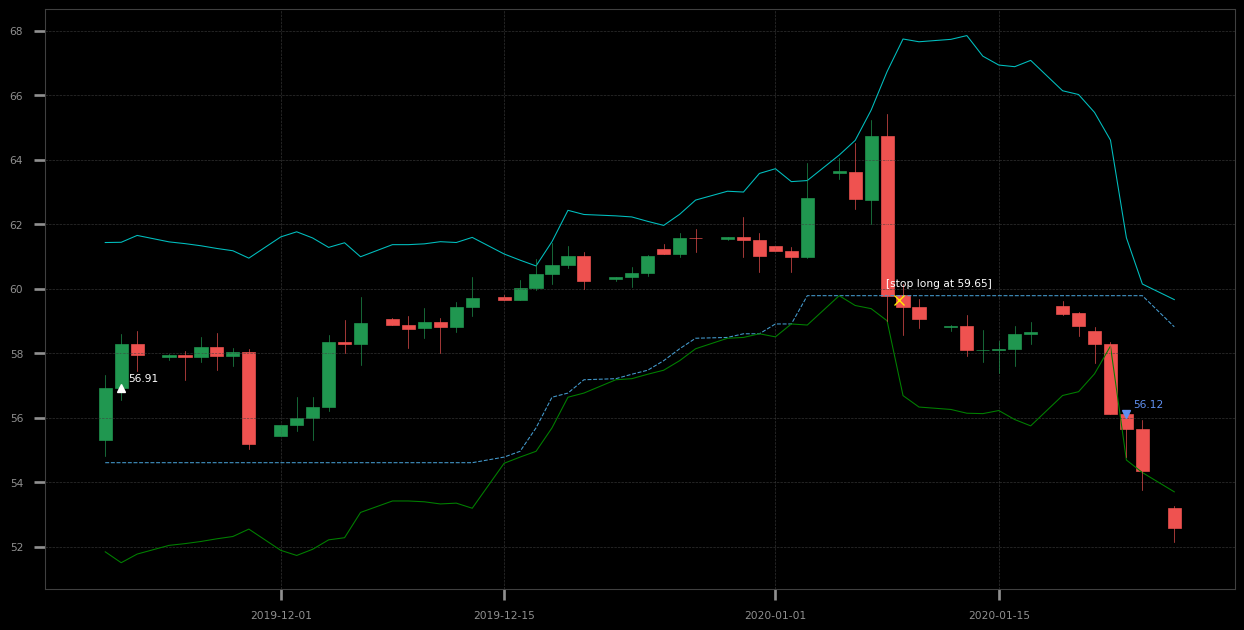

In [50]:
_z = slice('2019-11-20', '2020-01-26')
fig(16, 8)
plt.plot(rd.rad[_z], '--')
plt.plot(td.L[_z], 'g')
plt.plot(td.S[_z], 'c')

ohlc_plot(md['XTIUSD'].ohlc('1d')[_z])

plot_entries(r_xti.results[0].executions[_z], font_size=8, ms=7)

In [ ]:
r_xti.report(1000)

In [35]:
z_ls('ticks/')

['ticks/BITMEX:ETHUSD', 'ticks/BITMEX:XBTUSD']